## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

## Data Preprocessing and EDA

#### Reading data from a csv file and examining the data

In [3]:
wine_data = pd.read_csv('Wine_quality_data.csv')

In [4]:
wine_data.shape

(1599, 12)

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [6]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


#### Checking number of NULL values and duplicate rows in each column.
- Removing rows with null values since their frequency is to less and removing them would not make a major change
- Dropping duplicate rows by keeping only the first occurrence of that row in the dataset

In [7]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [8]:
wine_data.dropna(inplace=True)

In [9]:
wine_data.duplicated().sum()

239

In [10]:
wine_data.drop_duplicates(keep='first', inplace=True)

In [11]:
wine_data.reset_index(drop=True, inplace=True)

#### Converting dtype of "QUALITY" column to int64 for easier processing

In [12]:
wine_data['quality'] = wine_data['quality'].astype(int)

#### Checking the frequency of each quality rating in the dataset
- Most of them are mid-range values

In [13]:
wine_data.quality.value_counts()

quality
5    576
6    534
7    167
4     53
8     17
3     10
Name: count, dtype: int64

#### Plotting PAIRPLOT for the entire dataset for an initial look at the trends in the dataset

<Figure size 2000x3000 with 0 Axes>

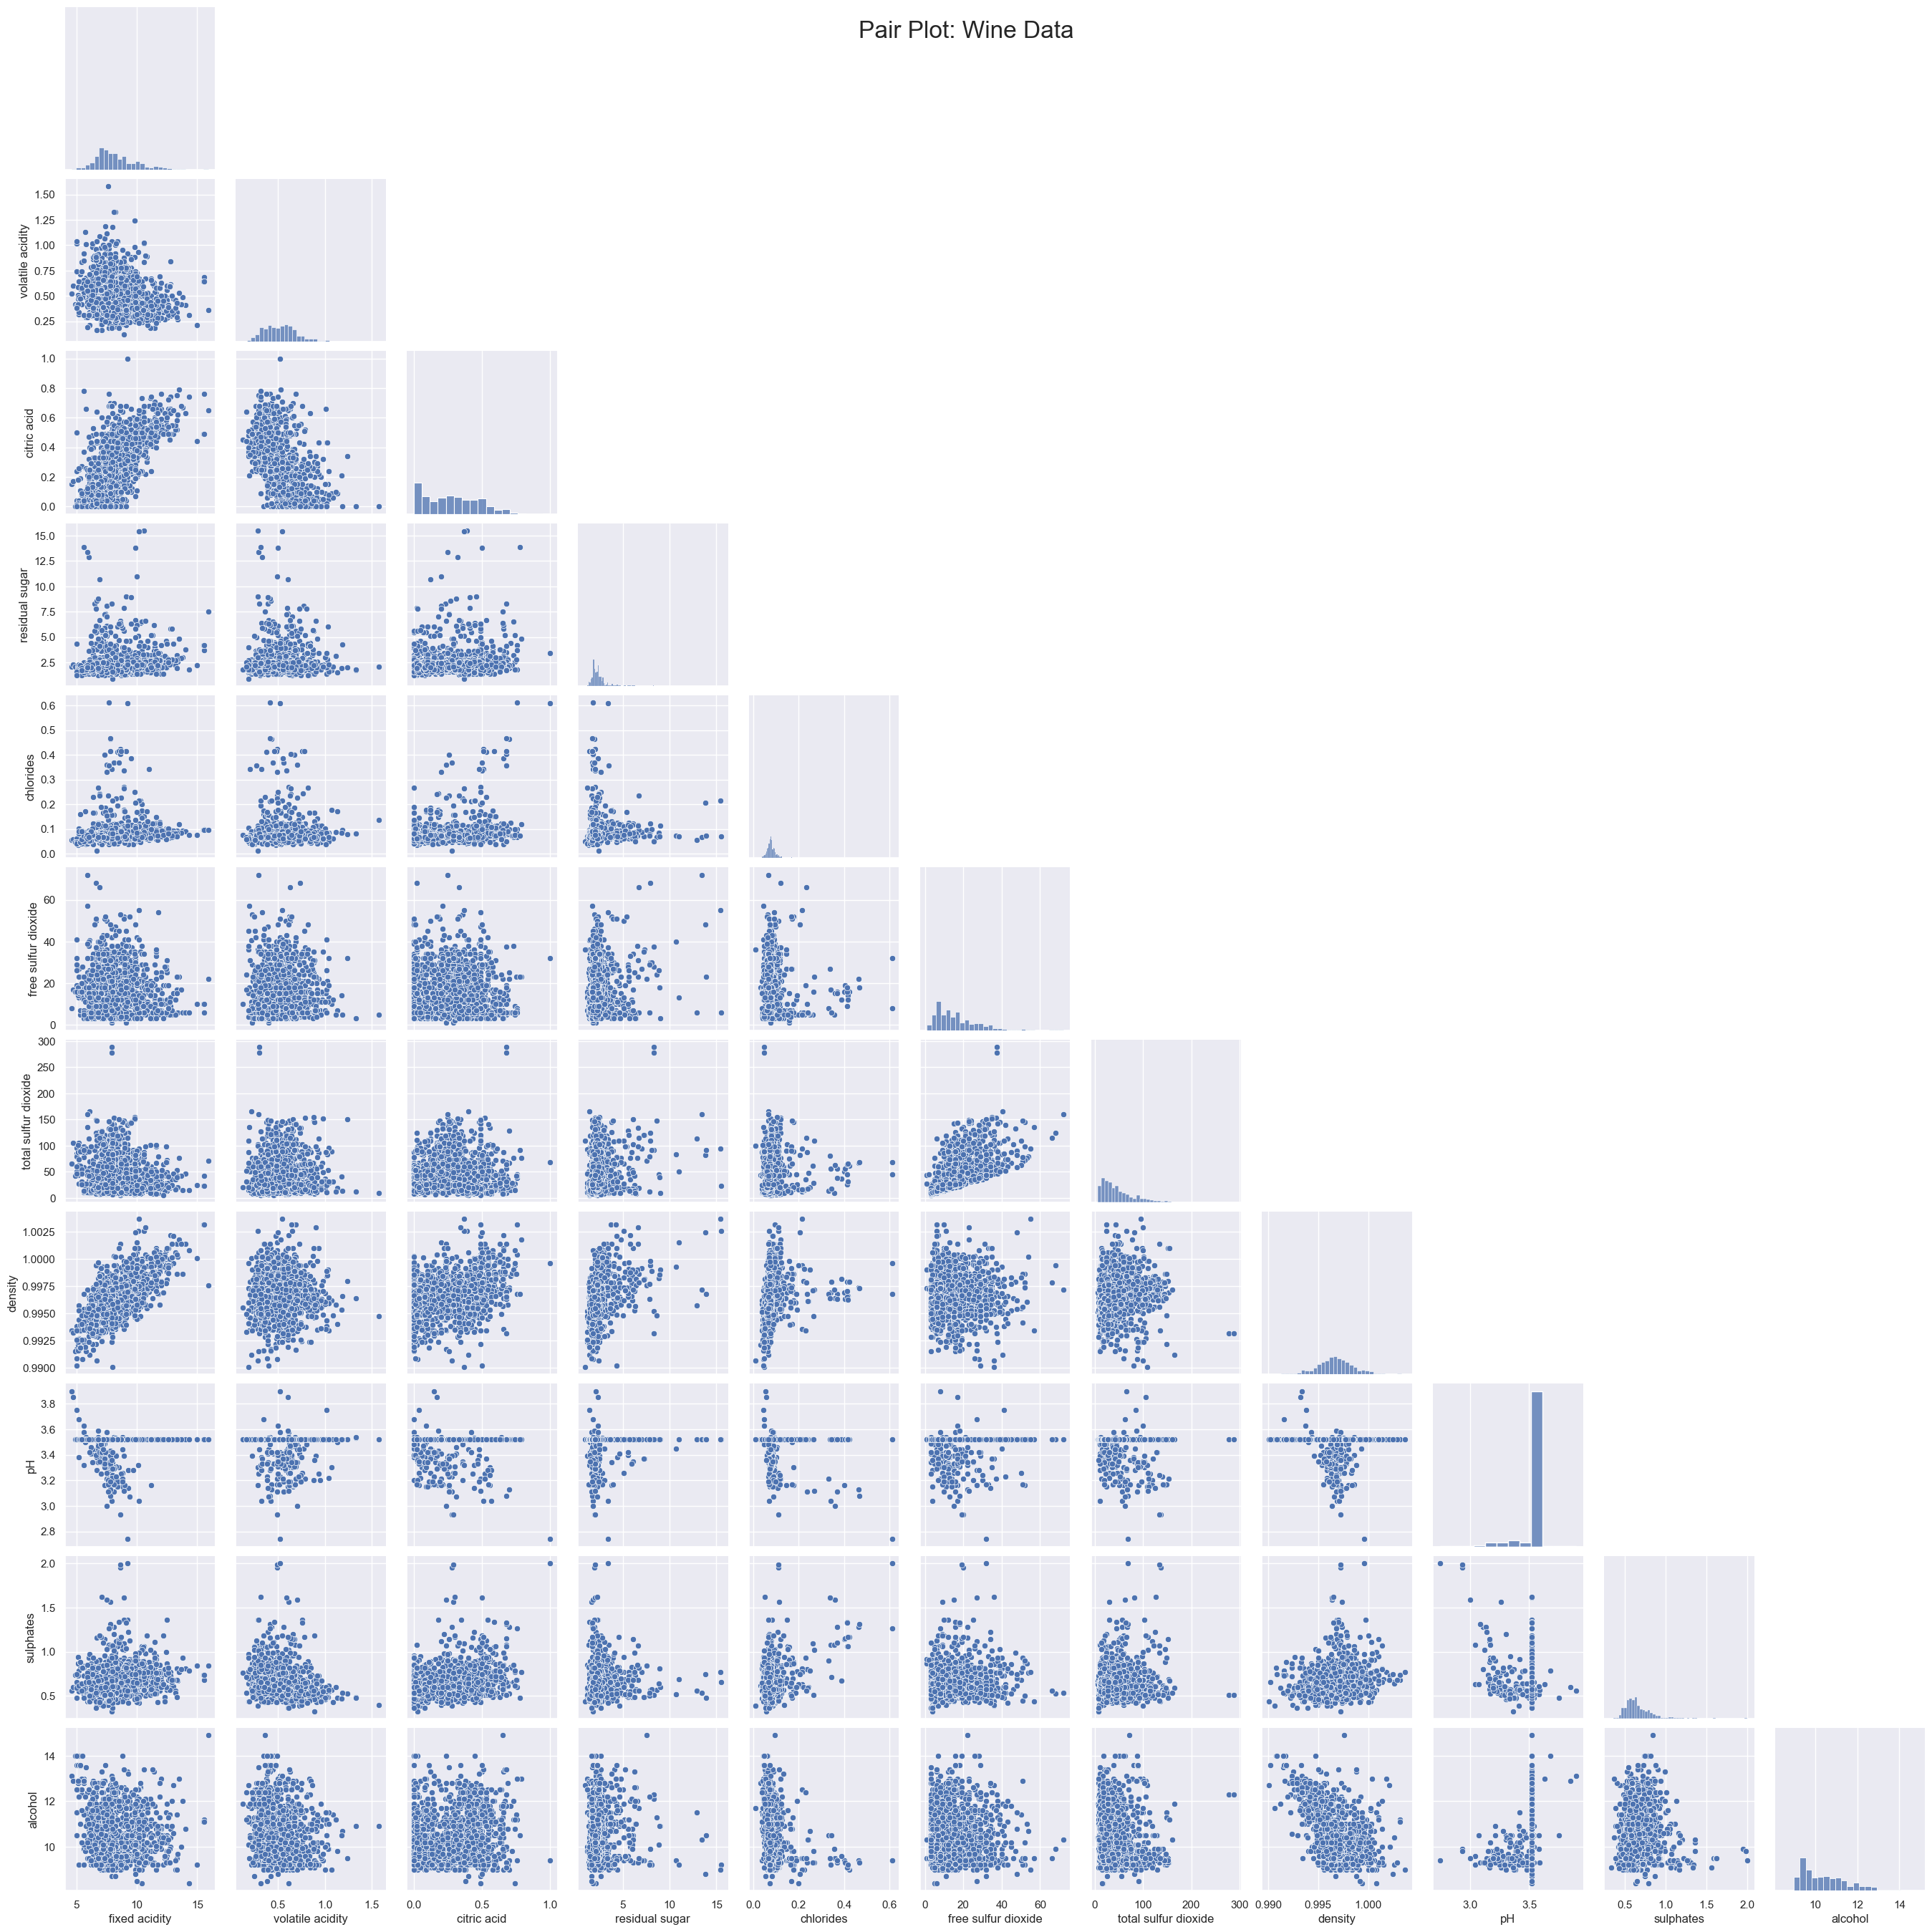

In [14]:
plt.figure(figsize=(20, 30))
sns.set()
sns.pairplot(data=wine_data.drop(columns="quality"), corner=True)
plt.suptitle("Pair Plot: Wine Data", fontsize=24)
plt.savefig('EDA_1.png')
plt.show()

#### Visualizing Correlation Matrix and Plotting a Correlation Heatmap
- "FIXED ACIDITY" seems to be highly correlated with "DENSITY" and "CITRIC ACID"
- "TOTAL SULFUR DIOXIDE" seems to be highly correlated with "FREE SULFUR DIOXIDE"

In [15]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.254854,0.667757,0.110763,0.085768,-0.141246,-0.103565,0.670647,0.028799,0.189972,-0.062488,0.119310
volatile acidity,-0.254854,1.000000,-0.550781,-0.002323,0.055367,-0.020344,0.071856,0.023552,-0.044660,-0.256420,-0.197026,-0.395122
citric acid,0.667757,-0.550781,1.000000,0.143961,0.210145,-0.048714,0.047112,0.358791,-0.001313,0.325518,0.104126,0.227625
residual sugar,0.110763,-0.002323,0.143961,1.000000,0.026603,0.160349,0.201251,0.324611,0.045385,-0.011966,0.063009,0.013832
chlorides,0.085768,0.055367,0.210145,0.026603,1.000000,0.000589,0.045795,0.193693,-0.278729,0.394525,-0.224228,-0.131059
free sulfur dioxide,-0.141246,-0.020344,-0.048714,0.160349,0.000589,1.000000,0.667648,-0.017826,-0.038800,0.053640,-0.081084,-0.050499
total sulfur dioxide,-0.103565,0.071856,0.047112,0.201251,0.045795,0.667648,1.000000,0.078242,-0.163559,0.035247,-0.217899,-0.178297
density,0.670647,0.023552,0.358791,0.324611,0.193693,-0.017826,0.078242,1.000000,-0.043731,0.146409,-0.504961,-0.184108
pH,0.028799,-0.044660,-0.001313,0.045385,-0.278729,-0.038800,-0.163559,-0.043731,1.000000,-0.252675,0.238420,0.132602
sulphates,0.189972,-0.256420,0.325518,-0.011966,0.394525,0.053640,0.035247,0.146409,-0.252675,1.000000,0.090874,0.248713


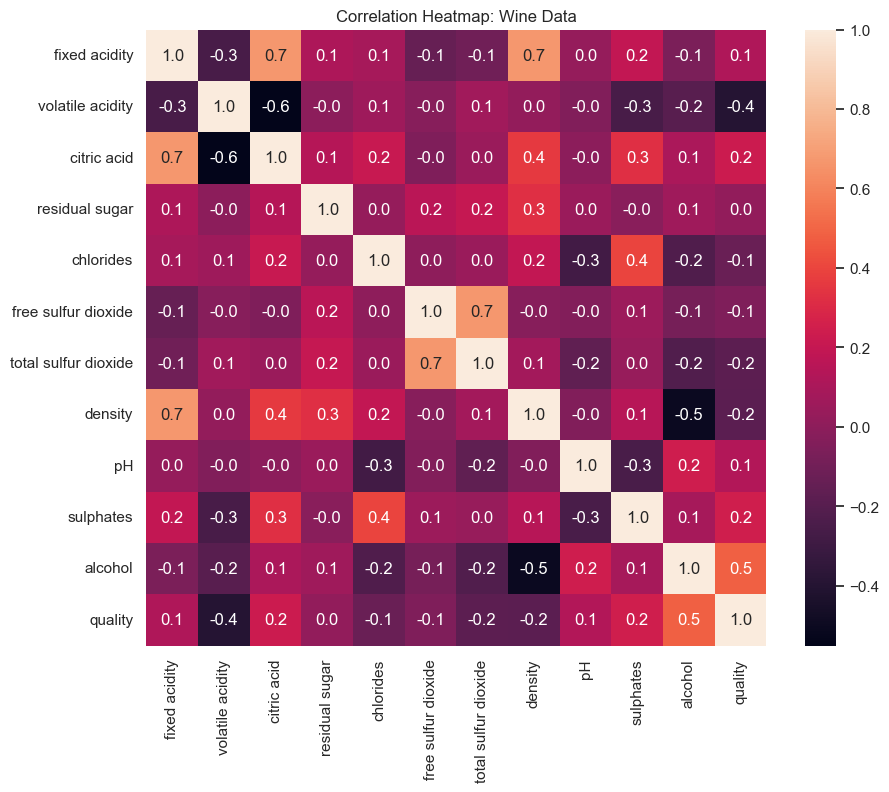

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, fmt='.1f')
plt.title("Correlation Heatmap: Wine Data")
plt.savefig('EDA_2.png')
plt.show()

#### PLotting BOXPLOTS for each column of the dataset
- "RESIDUAL SUGAR", "FREE SULFUR DIOXIDE", and "TOTAL SULFUR DIOXIDE" have many outliers

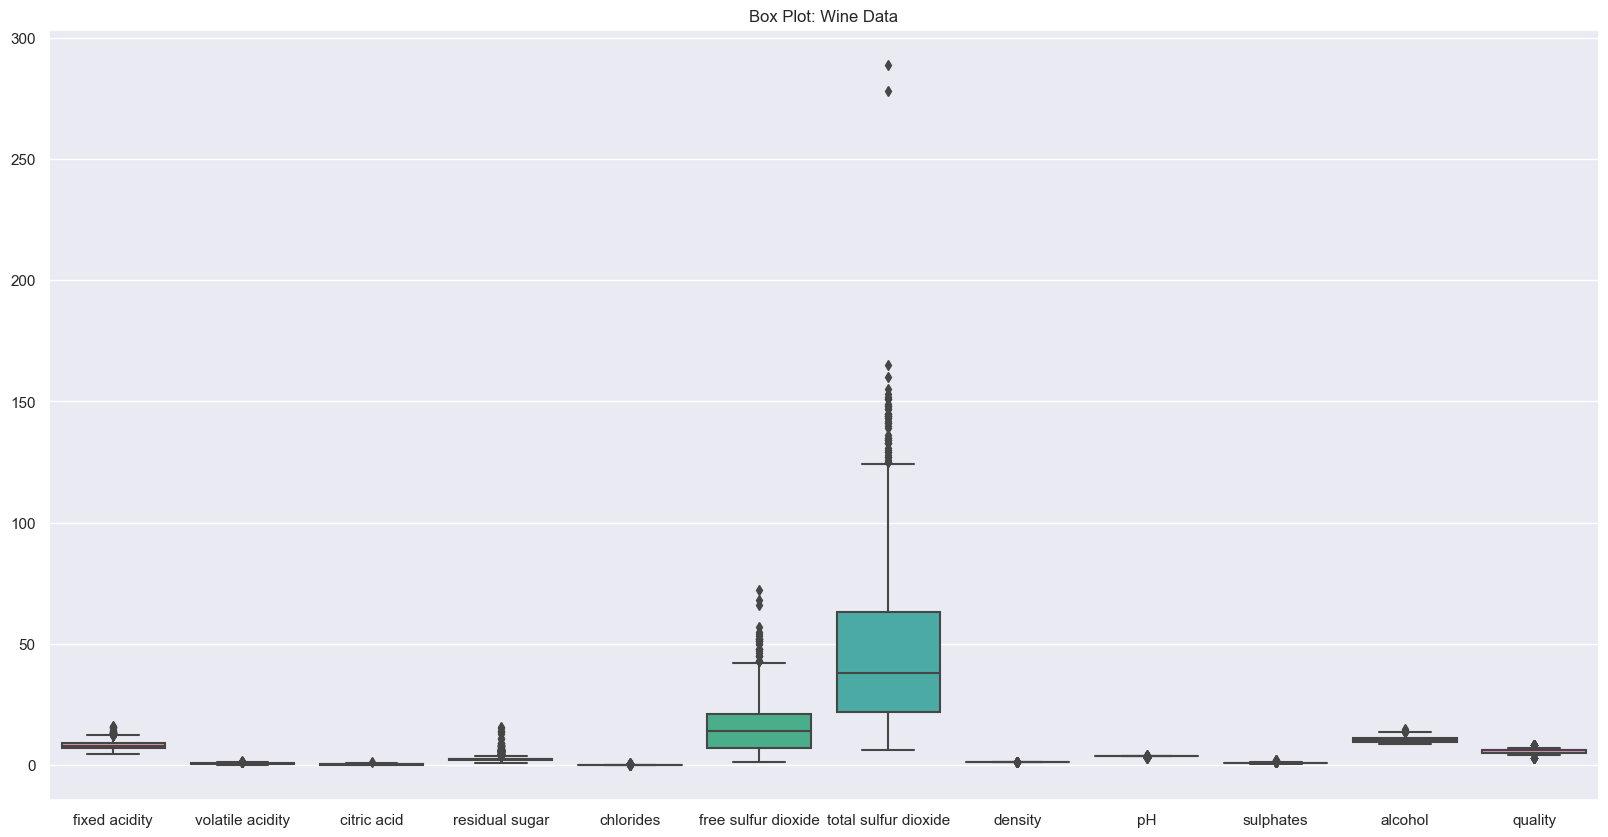

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data=wine_data)
plt.title("Box Plot: Wine Data")
plt.savefig('EDA_3.png')
plt.show()

#### Plotting HISTOGRAMS for each column in the dataset to visualize the nature of their distribution
- Most of the columns have right skewed data, while "pH" has a left skewed data
- "DENSITY" and "QUALITY" show an approximately unimodal distribution

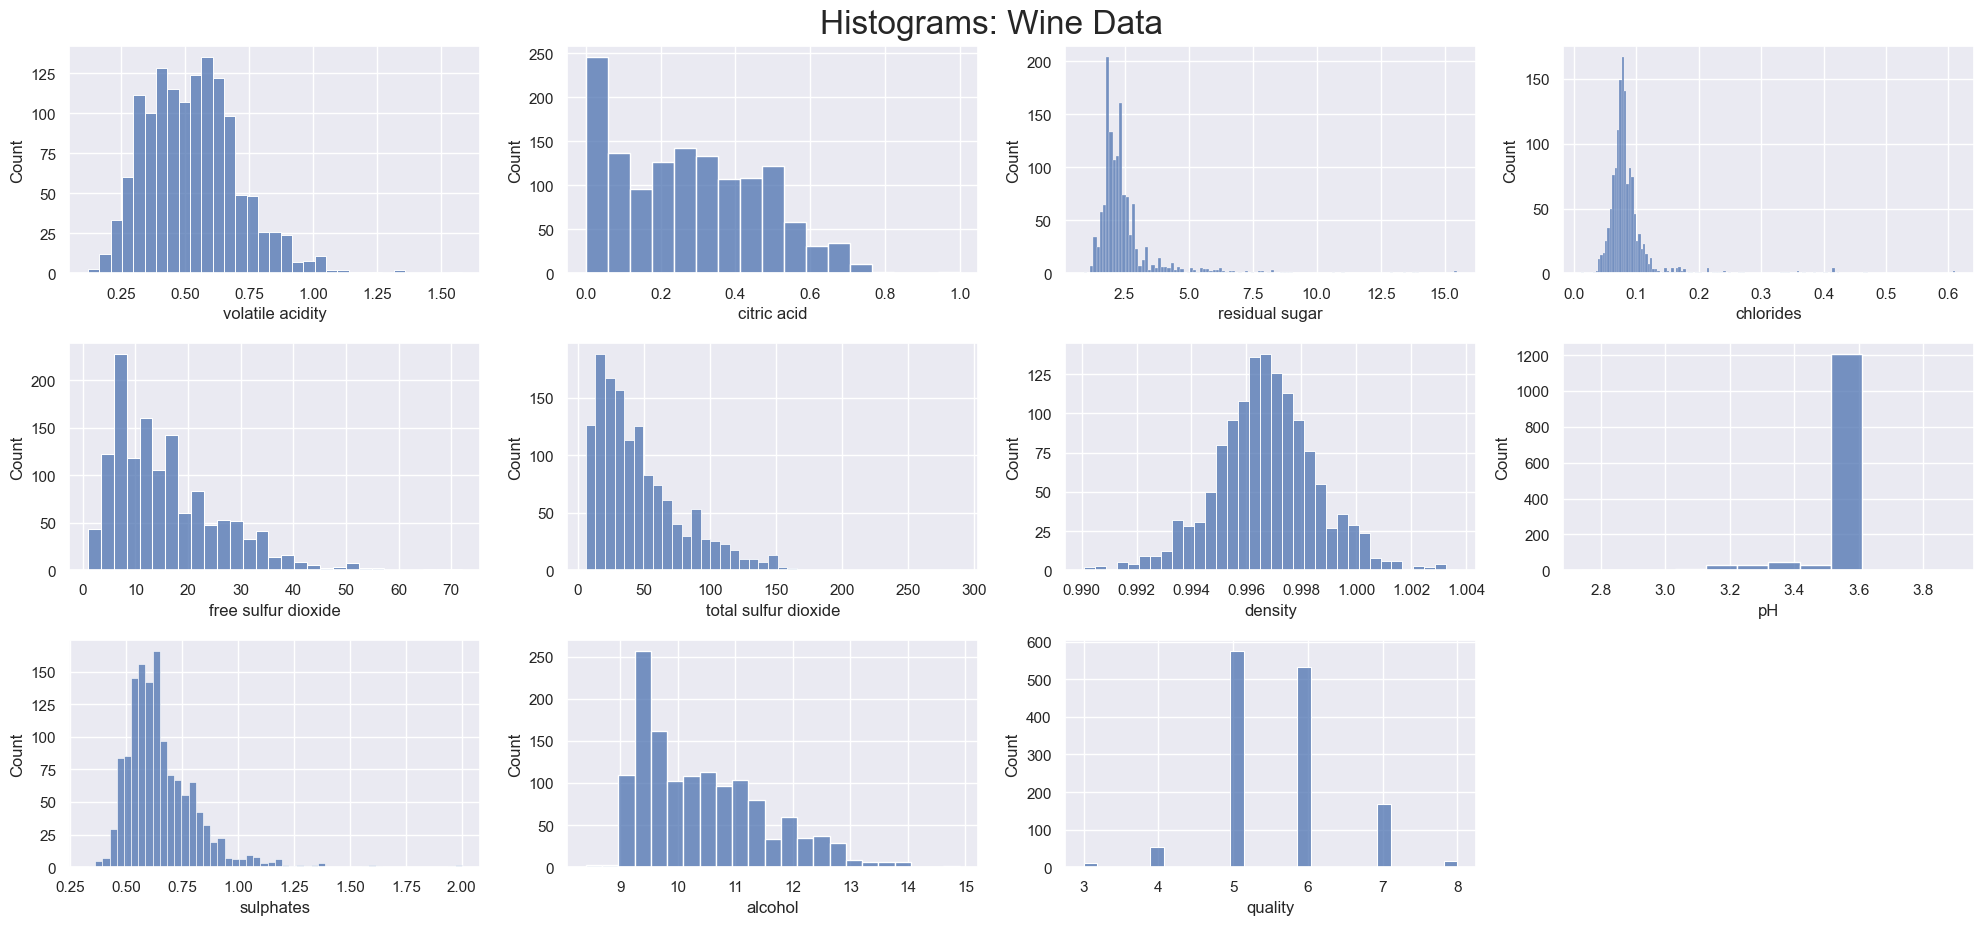

In [18]:
plt.figure(figsize = (20,15))

for i in range(1,12):
    plt.subplot(5,4,i)
    sns.histplot(wine_data[wine_data.columns[i]])

plt.suptitle("Histograms: Wine Data", fontsize=24)
plt.tight_layout()
plt.savefig('EDA_4.png')
plt.show()

#### Plotting SCATTER PLOT of "VOLATILE ACIDITY" and "QUALITY"
- "QUALITY" seems to be increasing with slight decrease in "VOLATILE ACIDITY"

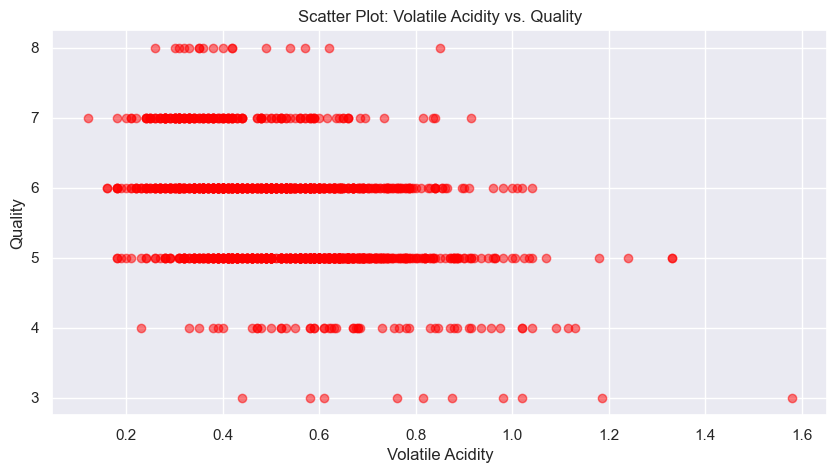

In [19]:
plt.figure(figsize=(10,5))
plt.scatter('volatile acidity', 'quality', data=wine_data, color='red', alpha=0.5)
plt.title('Scatter Plot: Volatile Acidity vs. Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.savefig('EDA_5.png')
plt.show()

#### Plotting SCATTER PLOT of "ALCOHOL" and "QUALITY"
- "QUALITY" seems to be increasing with slight increase in "ALCOHOL" content

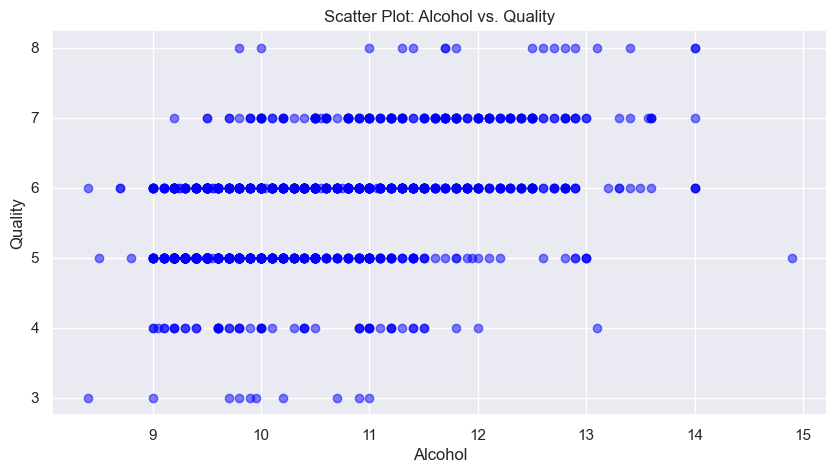

In [20]:
plt.figure(figsize=(10,5))
plt.scatter('alcohol', 'quality', data=wine_data, color='blue', alpha=0.5)
plt.title('Scatter Plot: Alcohol vs. Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.savefig('EDA_6.png')
plt.show()

#### Plotting SCATTER PLOT of "pH" and "QUALITY"
- No specific trend observed except that most of the "pH" values are concentrated in the center of its range 

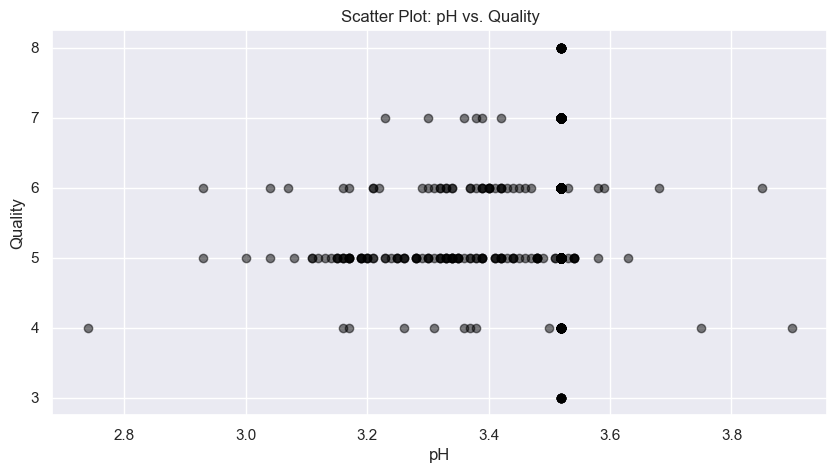

In [21]:
plt.figure(figsize=(10,5))
plt.scatter('pH', 'quality', data=wine_data, color='black', alpha=0.5)
plt.title('Scatter Plot: pH vs. Quality')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.savefig('EDA_7.png')
plt.show()

#### Making a copy of the original dataset for Model Training

In [120]:
wine_data_class = wine_data.copy()

## Machine Learning Steps

- Target column : "QUALITY"
- Since "QUALITY" consists of classes ranging from 1-10, converting it into binary values would be better.
- <b><u> Precision</u></b> should be the most important score to look for, since we want to minimize false positives. We do not want to misclassify many low quality wines as high quality wines.
- <b><u> Accuracy</u></b> on the other hand should not be prioritized here since there is class imbalance.
- It should be considered better to misclassify high quality wine as low quality wine than the other way round.

#### Converting "QUALITY" to binary values for binary classification
- Chose [0,5] and [6,10] as two categories for quality since they are equal intervals and have similar frequencies.
- 0: Low Quality, 1: High Quality
- Also because the dataset constitutes many items with moderate quality, a 50-50 distribution of intervals would give better results and would not need further steps to improve the <b>Precision</b> of the model.
- If there are special requirements like increasing the benchmark for classifying a wine as "high quality", then post training steps like hyperparameter tuning with (scoring="precision"), feature elimination or oversampling might be required to increase the <b>Precision</b> of the model.

In [246]:
wine_data_class['binary quality'] = np.where(wine_data_class['quality']>5, 1, 0)

In [247]:
wine_data_class['binary quality'].value_counts()

binary quality
1    718
0    639
Name: count, dtype: int64

#### Splitting Data-Target values into training and testing sets

In [249]:
X = wine_data_class.drop(columns=['quality', 'binary quality']).values
y = wine_data_class['binary quality'].values

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

#### Observing the descriptive statistics of dataset
- Features have different units and thus different distributions and statistical values
- Feature scaling required

In [368]:
wine_data_class.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary quality
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,8.312012,0.529278,0.272579,2.523803,0.088136,15.902727,46.824245,0.996708,3.497856,0.658858,10.433837,5.623434,0.529108
std,1.737699,0.183084,0.195533,1.353203,0.049412,10.451925,33.429220,0.001870,0.081566,0.170743,1.082129,0.823948,0.499336
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.520000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.520000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000,1.000000


#### Scaling training and testing data since most features have different units

In [251]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression model training and evaluation

In [252]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [283]:
print(f'Precision: {precision_score(y_test, lr_model.predict(X_test_scaled)): .2f}')
print(f'Recall:    {recall_score(y_test, lr_model.predict(X_test_scaled)): .2f}')
print(f'Accuracy:  {accuracy_score(y_test, lr_model.predict(X_test_scaled)): .2f}')
print(f'F1:        {f1_score(y_test, lr_model.predict(X_test_scaled)): .2f}')

Precision:  0.81
Recall:     0.75
Accuracy:   0.77
F1:         0.77


In [254]:
print(classification_report(y_test, lr_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       192
           1       0.81      0.75      0.77       216

    accuracy                           0.77       408
   macro avg       0.77      0.77      0.77       408
weighted avg       0.77      0.77      0.77       408



#### Random Forest model training and evaluation

In [255]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [282]:
print(f'Precision: {precision_score(y_test, rf_model.predict(X_test_scaled)): .2f}')
print(f'Recall:    {recall_score(y_test, rf_model.predict(X_test_scaled)): .2f}')
print(f'Accuracy:  {accuracy_score(y_test, rf_model.predict(X_test_scaled)): .2f}')
print(f'F1:        {f1_score(y_test, rf_model.predict(X_test_scaled)): .2f}')

Precision:  0.80
Recall:     0.74
Accuracy:   0.76
F1:         0.77


In [257]:
print(classification_report(y_test, rf_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       192
           1       0.80      0.74      0.77       216

    accuracy                           0.76       408
   macro avg       0.76      0.76      0.76       408
weighted avg       0.76      0.76      0.76       408



#### K-Nearest Neighbours model training and evaluation

In [294]:
knnc_model = KNeighborsClassifier(n_neighbors=2)
knnc_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [295]:
print(f'Precision: {precision_score(y_test, knnc_model.predict(X_test_scaled)): .2f}')
print(f'Recall:    {recall_score(y_test, knnc_model.predict(X_test_scaled)): .2f}')
print(f'Accuracy:  {accuracy_score(y_test, knnc_model.predict(X_test_scaled)): .2f}')
print(f'F1:        {f1_score(y_test, knnc_model.predict(X_test_scaled)): .2f}')

Precision:  0.80
Recall:     0.55
Accuracy:   0.69
F1:         0.65


In [296]:
print(classification_report(y_test, knnc_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.63      0.85      0.72       192
           1       0.80      0.55      0.65       216

    accuracy                           0.69       408
   macro avg       0.72      0.70      0.69       408
weighted avg       0.72      0.69      0.69       408



## Model results evaluation

#### Plotting COUNTPLOTS and confusion matrix HEATMAPS to visualize model performance
- Logistic Regression has a good precision score, and has only few misclassifications in the positive class.
- Random Forest shows very similar results as Logistic Regression and can be considered equally good.
- KNN also has a good precision score with the <b>LEAST</b> misclassifications in the <b>negative</b> class. However, considering other metrics and prioritizing to minimize misclassifications in the <b>positive</b> class, this model has the worst performance for our use case.

In [355]:
def visualize_model(model_name, test_data, predictions):

    data = pd.DataFrame({'True Labels': test_data, 'Predicted Labels': predictions})
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(data=data, x='True Labels', hue='Predicted Labels')
    plt.xlabel('True Labels')
    plt.ylabel('Count')
    plt.title(f'Class Distribution ({model_name}): True vs. Predicted Labels')
    plt.legend(title='Predicted Labels', loc='upper center', labels=['Negative Class', 'Positive Class'])
    
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(test_data, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix ({model_name})')
    
    plt.savefig(f'basic_{model_name}_viz.png')
    plt.show()

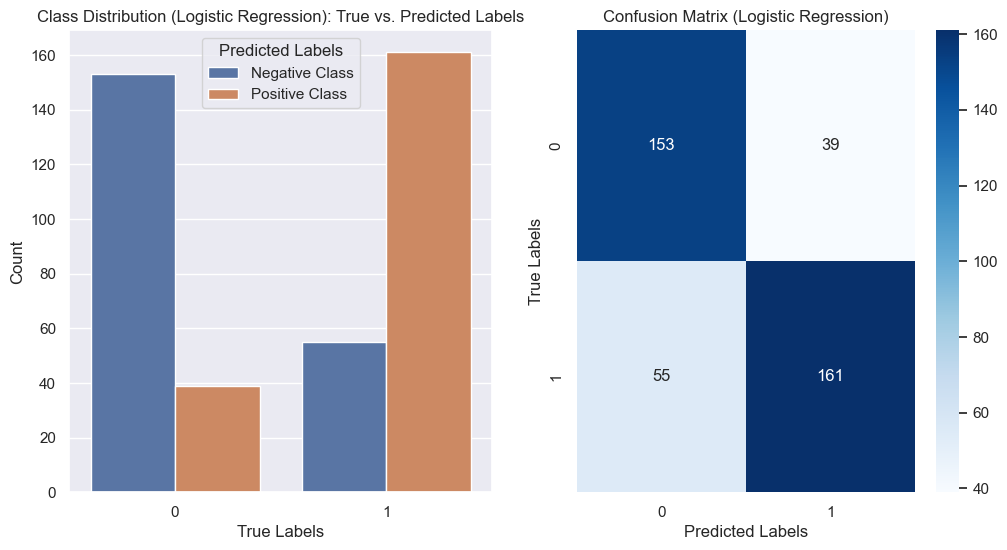

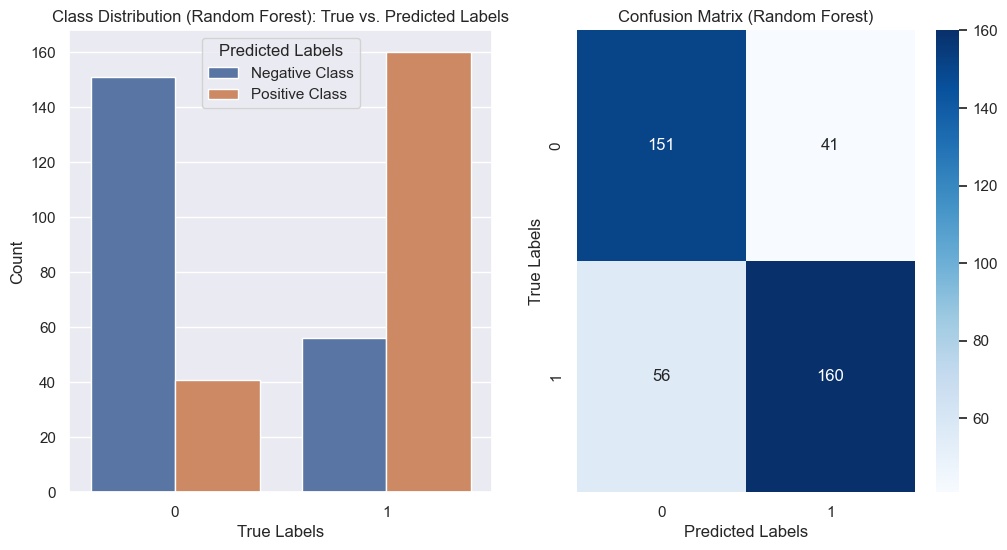

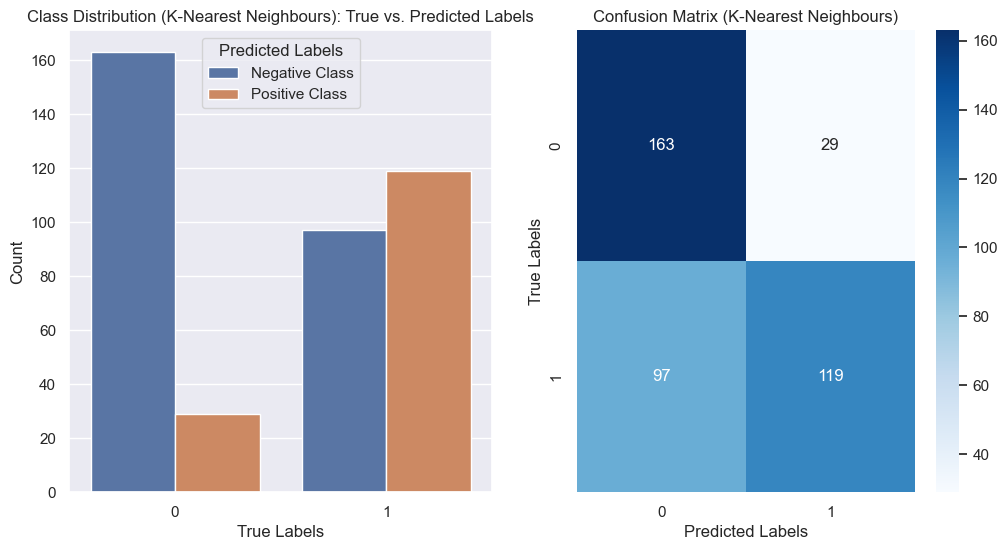

In [356]:
visualize_model("Logistic Regression", y_test, lr_model.predict(X_test_scaled))
visualize_model("Random Forest", y_test, rf_model.predict(X_test_scaled))
visualize_model("K-Nearest Neighbours", y_test, knnc_model.predict(X_test_scaled))

## Storing all models' results into a .csv file

In [360]:
results = {"Logistic Regression" : [0.81, 0.75, 0.77, 0.77], "Random Forest" : [0.80, 0.74, 0.76, 0.77],
          "KNN" : [0.80, 0.55, 0.69, 0.65]}
results_df = pd.DataFrame(results, index=['Precision', 'Recall', 'Accuracy', 'F1'])

In [364]:
results_df

,Logistic Regression,Random Forest,KNN
Precision,0.81,0.80,0.80
Recall,0.75,0.74,0.55
Accuracy,0.77,0.76,0.69
F1,0.77,0.77,0.65


In [363]:
results_df.to_csv('results_basic.csv', index=True)